# Plot dose depth dose and uncertainty

Use the output of the following simulation:
- Folder: exercices/
- Macros: ex1.mac


In [76]:
# Tell Jupyter to plot figure right in the page
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# Module with plot capabilities
import matplotlib.pyplot as plt
plt.style.use('../../../supplimentary_material/plotting_style_sheet.txt')

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from glob import glob
from scipy.optimize import curve_fit 

0 0.5439147452
1 1.0
2 0.9893489457
3 0.9628966543
4 0.9350333342
5 0.9054626397
6 0.8803074572
7 0.8523904273
8 0.8249142507
9 0.7999354463
10 0.7717250801
11 0.747021002
12 0.7181812468
13 0.6941091661
14 0.6691257581
15 0.6456378605
16 0.6214151864
17 0.5990226046
18 0.5749519446
19 0.5556361722
20 0.5336292936
21 0.5128099777
22 0.4931538386
23 0.4732112927
24 0.4541541585
25 0.4353051533
26 0.4176944928
27 0.4019025342
28 0.3863688418
29 0.3694624487
30 0.355913165
31 0.3407087791
32 0.3270746399
33 0.3124019998
34 0.2995022019
35 0.2869112554
36 0.2739264363
37 0.2630248134
38 0.2517802011
39 0.2401939852
40 0.2295329188
41 0.2201924937
42 0.2107939626
43 0.2011164014
44 0.1918183999
45 0.1845741206
46 0.1762484886
47 0.1682717449
48 0.1610857015
49 0.1530405994
50 0.147076978
51 0.1401699975
52 0.1339188031
53 0.1270445648
54 0.1215044282
55 0.1165969342
56 0.1113862074
57 0.1064470795
58 0.1017500158
59 0.09696828679
60 0.09289581532
61 0.08868493466
62 0.08435561803
63 0.08046

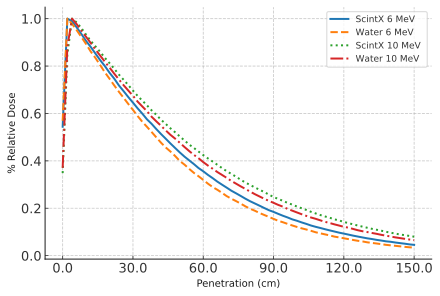

In [80]:
dose_files = glob('../output/*depth_dose-Dose.txt')

fig = plt.figure(facecolor='white', constrained_layout=True)
symbols = ['solid', 'dashed', 'dotted', 'dashdot', 'solid', 'solid']

for edep_file, symbol in zip(sorted(dose_files), symbols):
    edep_values = np.loadtxt(edep_file) # This will actually skip the lines begining with #
    for index, value in enumerate(edep_values):
        print(index, value)
    energy, material, *_ = os.path.basename(edep_file).split('_')
    energy = int(energy.lstrip('E'))
    
    # The water is (50, 400, 400)mm and the profile is subdividing the 400mm*2 volume
    # into an amount of parts determined by the comments at the top of the file
    size = !grep Voxel {edep_file}
    
    with open(edep_file) as fhandle:
        lines = fhandle.readlines()
        vox_line = 3
        information = lines[vox_line]
        information = information.strip().split()[3]
        size_of_voxel_in_mm = information.replace('(', '').replace(')', '').split(',')[2]
        
    
    slicing = 76
    x_step_size = float(size[0].split(',')[-1].rstrip(')'))
    x_values = np.arange(0, 4000, int(size_of_voxel_in_mm))[:slicing]
    
    x_tick = x_values[::15] # Takes every 15th x_value
    x_tick_values = x_tick/10 # Converts mm to cm
    
    # Plot every nth point to make it easier to add symbols instead of just colors
    nth = 12
    p = plt.plot(x_values, edep_values[:slicing], 
                 linestyle=symbol,
                 linewidth=2,
                 #marker=symbol,
                 mfc='none', 
                 mec='black',
                 mew=.8,
                 ms=5,
                 label=f'{material} ${energy}$ MeV ')

    plt.legend(prop={'size':9})
    plt.xlabel('Penetration (cm)')
    plt.ylabel('% Relative Dose')
    plt.xticks(x_tick, x_tick_values)
    #plt.title('Water Equivalency (Longitudinal)')
    
ax = fig.get_axes()[0]
#ax.ticklabel_format(axis='both',style='sci', scilimits=(0, 3), useMathText=True)
#fig.suptitle('Water Equivalency (Longitudinal)')
#plt.savefig('../../../figures/water_equivalency/energy_depostition_longitude.pdf')

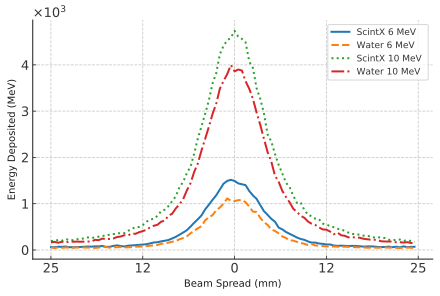

In [75]:
profile_files = glob('../output/*profile_dose-Edep.txt')

fig = plt.figure(facecolor='white', constrained_layout=True)
symbols = ['solid', 'dashed', 'dotted', 'dashdot']

for edep_file, linesytle in zip(sorted(profile_files), symbols):
    edep_values = np.loadtxt(edep_file) # This will actually skip the lines begining with #
    energy, material, *_ = os.path.basename(edep_file).split('_')
    energy = int(energy.lstrip('E'))

    # The water is (50, 400, 400)mm and the profile is subdividing the 50mm*2 volume
    # into an amount of parts determined by the comments at the top of the file
    size = !grep Voxel {edep_file}
    x_step_size = float(size[0].split(',')[0].split()[-1].lstrip('('))
    x_values = np.arange(-50, 50, x_step_size*2)
    
    # Plot every nth point to make it easier to add symbols instead of just colors
    nth = 10
    plt.plot(x_values[::nth], edep_values[::nth], 
             linestyle=linesytle,
             linewidth=2,
             marker='', 
             label=f'{material} ${energy}$ MeV ')

    plt.legend(prop={'size':9})
    plt.xlabel('Beam Spread (mm)')
    plt.ylabel('Energy Deposited (MeV)')
    #plt.title('Water Equivalency (Transversal)')
    
    tick_locations = np.linspace(-50, 50, 5)
    tick_values = np.abs(np.linspace(-25, 25, 5)).astype(int)
    plt.xticks(tick_locations, tick_values)
    
ax = fig.get_axes()[0]
ax.ticklabel_format(axis='y',style='sci', scilimits=(0, 3), useMathText=True)
fig.savefig('../../../figures/water_equivalency/energy_deposition_transverse.pdf')